# Making the Most of your Colab Subscription



## Faster GPUs

Users who have purchased one of Colab's paid plans have access to faster GPUs and more memory. You can upgrade your notebook's GPU settings in `Runtime > Change runtime type` in the menu to select from several accelerator options, subject to availability.

The free of charge version of Colab grants access to Nvidia's T4 GPUs subject to quota restrictions and availability.

You can see what GPU you've been assigned at any time by executing the following cell. If the execution result of running the code cell below is "Not connected to a GPU", you can change the runtime by going to `Runtime > Change runtime type` in the menu to enable a GPU accelerator, and then re-execute the code cell.


In [1]:
!ls -lha

!du -h --max-depth=1

total 16K
drwxr-xr-x 1 root root 4.0K Jan 16 14:29 .
drwxr-xr-x 1 root root 4.0K Jan 18 10:31 ..
drwxr-xr-x 4 root root 4.0K Jan 16 14:29 .config
drwxr-xr-x 1 root root 4.0K Jan 16 14:29 sample_data
140K	./.config
55M	./sample_data
55M	.


In [2]:
!find /content -size +10M

/content/sample_data/mnist_train_small.csv
/content/sample_data/mnist_test.csv


In [3]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Jan 18 10:38:12 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   31C    P8               8W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In order to use a GPU with your notebook, select the `Runtime > Change runtime type` menu, and then set the hardware accelerator to the desired option.

In [4]:
import torch
print(torch.cuda.is_available())

True


## More memory

Users who have purchased one of Colab's paid plans have access to high-memory VMs when they are available. More powerful GPUs are always offered with high-memory VMs.



You can see how much memory you have available at any time by running the following code cell. If the execution result of running the code cell below is "Not using a high-RAM runtime", then you can enable a high-RAM runtime via `Runtime > Change runtime type` in the menu. Then select High-RAM in the Runtime shape toggle button. After, re-execute the code cell.


In [5]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [6]:
!python -m pip install --upgrade pip -q
!pip install transformers==4.38.1 -q -U
!pip install bitsandbytes==0.42.0 -q -U
!pip install peft==0.8.2 -q -U
!pip install accelerate==0.27.2 -q -U
!pip install datasets==2.17.1 -q -U
!pip install scipy==1.12.0 -q -U
!pip install trl==0.7.11 -q -U
!pip install hf_transfer==0.1.5 -q -U
!pip install huggingface_hub==0.20.3 -q -U
!pip install wandb==0.16.3 -q -U
!transformers-cli env

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 95.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 90.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.38.1 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.0/105.0 MB 59.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.7/536.7 kB 14.8 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2023.10.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [7]:
# Required when training models/data that are gated on HuggingFace, and required for pushing models to HuggingFace
from huggingface_hub import notebook_login
notebook_login()

In [8]:
%env HF_HUB_ENABLE_HF_TRANSFER=True

env: HF_HUB_ENABLE_HF_TRANSFER=True


In [9]:
model_id = "facebook/bart-base"

In [10]:
from transformers import AutoTokenizer, BartForCausalLM, BitsAndBytesConfig, AutoConfig
import torch

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)



In [11]:
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig

bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,  # Enables 4-bit quantization
    bnb_4bit_use_double_quant=True,  # Enables double quantization
    bnb_4bit_quant_type="nf4",  # Uses NormalFloat4 for quantization
    bnb_4bit_compute_dtype=torch.float16
)

In [12]:
import os
cache_dir = "/content/drive/My Drive/hf_memorization_cache"
os.makedirs(cache_dir, exist_ok=True) # Ensure the directory exists

In [13]:
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    quantization_config=bnb_config,
    # rope_scaling={"type": "linear", "factor": 2.0},
    device_map='auto',
    # trust_remote_code=False,
    torch_dtype=torch.float16,
    cache_dir = cache_dir)

config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Some weights of BartForCausalLM were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['decoder.embed_tokens.weight', 'lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [14]:
tokenizer = AutoTokenizer.from_pretrained(model_id,use_fast=True,trust_remote_code=True)


config.json:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [15]:
# Check there are no parameters overflowing onto cpu (meta).
for n, p in model.named_parameters():
    if p.device.type == "meta":
        print(f"{n} is on meta!")

In [16]:
print(model.config.max_position_embeddings)
print(model.config.eos_token_id)

1024
2


In [17]:
def print_trainable_parameters(model):
    """
    Prints the number of trainable parameters in the model and lists which parameters are trainable.
    """
    trainable_params = 0
    non_trainable_params = 0
    all_params = 0

    print("Trainable Parameters:")
    for name, param in model.named_parameters():
        all_params += param.numel()
        if param.requires_grad:
            trainable_params += param.numel()
            print(f"  {name}")
        else:
            non_trainable_params += param.numel()

    print("\nNon-Trainable Parameters:")
    for name, param in model.named_parameters():
        if not param.requires_grad:
            print(f"  {name}")

    print(
        f"\nSummary:\n  Trainable params: {trainable_params}\n  Non-Trainable params: {non_trainable_params}\n  All params: {all_params}\n  Trainable%: {100 * trainable_params / all_params}"
    )

In [18]:
from peft import prepare_model_for_kbit_training

model.gradient_checkpointing_enable() #Comment this in to save on VRAM
model = prepare_model_for_kbit_training(model) # only set this if using quantization.

from peft import LoraConfig, get_peft_model

peft_config = LoraConfig(
    r=8,
    lora_alpha=32,
    target_modules=[
        "q_proj",
        "k_proj",
        "v_proj",
        "o_proj",
        "gate_proj",
        "up_proj",
        "down_proj"
    ],
    lora_dropout=0.1,
    bias="none",
    task_type="CAUSAL_LM"
)

model = get_peft_model(model, peft_config) #move to a peft model

In [19]:
model

PeftModelForCausalLM(
  (base_model): LoraModel(
    (model): BartForCausalLM(
      (model): BartDecoderWrapper(
        (decoder): BartDecoder(
          (embed_tokens): Embedding(50265, 768, padding_idx=1)
          (embed_positions): BartLearnedPositionalEmbedding(1026, 768)
          (layers): ModuleList(
            (0-5): 6 x BartDecoderLayer(
              (self_attn): BartSdpaAttention(
                (k_proj): lora.Linear4bit(
                  (base_layer): Linear4bit(in_features=768, out_features=768, bias=True)
                  (lora_dropout): ModuleDict(
                    (default): Dropout(p=0.1, inplace=False)
                  )
                  (lora_A): ModuleDict(
                    (default): Linear(in_features=768, out_features=8, bias=False)
                  )
                  (lora_B): ModuleDict(
                    (default): Linear(in_features=8, out_features=768, bias=False)
                  )
                  (lora_embedding_A): ParameterDict()
  

In [20]:
print_trainable_parameters(model)


Trainable Parameters:
  base_model.model.model.decoder.layers.0.self_attn.k_proj.lora_A.default.weight
  base_model.model.model.decoder.layers.0.self_attn.k_proj.lora_B.default.weight
  base_model.model.model.decoder.layers.0.self_attn.v_proj.lora_A.default.weight
  base_model.model.model.decoder.layers.0.self_attn.v_proj.lora_B.default.weight
  base_model.model.model.decoder.layers.0.self_attn.q_proj.lora_A.default.weight
  base_model.model.model.decoder.layers.0.self_attn.q_proj.lora_B.default.weight
  base_model.model.model.decoder.layers.0.encoder_attn.k_proj.lora_A.default.weight
  base_model.model.model.decoder.layers.0.encoder_attn.k_proj.lora_B.default.weight
  base_model.model.model.decoder.layers.0.encoder_attn.v_proj.lora_A.default.weight
  base_model.model.model.decoder.layers.0.encoder_attn.v_proj.lora_B.default.weight
  base_model.model.model.decoder.layers.0.encoder_attn.q_proj.lora_A.default.weight
  base_model.model.model.decoder.layers.0.encoder_attn.q_proj.lora_B.def

In [21]:
print(tokenizer)
print(tokenizer.vocab_size)

BartTokenizerFast(name_or_path='facebook/bart-base', vocab_size=50265, model_max_length=1024, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("<s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	1: AddedToken("<pad>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	2: AddedToken("</s>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	3: AddedToken("<unk>", rstrip=False, lstrip=False, single_word=False, normalized=True, special=True),
	50264: AddedToken("<mask>", rstrip=False, lstrip=True, single_word=False, normalized=True, special=True),
}
50265


In [22]:
print(tokenizer.bos_token)
print(tokenizer.eos_token)

<s>
</s>


In [23]:

#Test the chat template
messages=[
    { 'role': 'user', 'content': "write a quick sort algorithm in python."},
    { 'role': 'assistant', 'content': "here you are."},
    { 'role': 'user', 'content': "great."},
]

inputs = tokenizer.apply_chat_template(messages, tokenize=False)
print(inputs)


No chat template is defined for this tokenizer - using a default chat template that implements the ChatML format (without BOS/EOS tokens!). If the default is not appropriate for your model, please set `tokenizer.chat_template` to an appropriate template. See https://huggingface.co/docs/transformers/main/chat_templating for more information.



<|im_start|>user
write a quick sort algorithm in python.<|im_end|>
<|im_start|>assistant
here you are.<|im_end|>
<|im_start|>user
great.<|im_end|>



In [24]:
chat = [
  {"role": "user", "content": "Hello, how are you?"},
  {"role": "assistant", "content": "I'm doing great. How can I help you today?"},
  {"role": "user", "content": "I'd like to show off how chat templating works!"},
]

tokenizer.apply_chat_template(chat, tokenize=False)

"<|im_start|>user\nHello, how are you?<|im_end|>\n<|im_start|>assistant\nI'm doing great. How can I help you today?<|im_end|>\n<|im_start|>user\nI'd like to show off how chat templating works!<|im_end|>\n"

In [25]:
## OPTION A - set the pad token to <pad>, if not <|pad|>, if not <unk> if <unk> is in the tokenizer OR set it to the EOS token.
if '<pad>' in tokenizer.get_vocab():
    print('<pad> token is in the tokenizer. Using <pad> for pad')
    # Set the pad token
    tokenizer.pad_token = '<pad>'
elif '<|pad|>' in tokenizer.get_vocab():
    print('<|pad|> token is in the tokenizer. Using <|pad|> for pad')
    # Set the pad token
    tokenizer.pad_token = '<|pad|>'
elif '<unk>' in tokenizer.get_vocab():
    print('<unk> token is in the tokenizer. Using unk for pad')
    # Set the pad token
    tokenizer.pad_token = '<unk>'
else:
    print(f'Using EOS token, {tokenizer.eos_token}, for padding. WARNING, this may not be ideal for chat fine-tuning models.')
    tokenizer.pad_token = tokenizer.eos_token

<pad> token is in the tokenizer. Using <pad> for pad


In [26]:
# Update pad token id in model and its config
model.pad_token_id = tokenizer.pad_token_id
model.config.pad_token_id = tokenizer.pad_token_id

# Check if they are equal
assert model.pad_token_id == tokenizer.pad_token_id, "The model's pad token ID does not match the tokenizer's pad token ID!"

# Print the pad token ids
print('Tokenizer pad token ID:', tokenizer.pad_token_id)
print('Model pad token ID:', model.pad_token_id)
print('Model config pad token ID:', model.config.pad_token_id)
print('Number of tokens now in tokenizer:', tokenizer.vocab_size)

Tokenizer pad token ID: 1
Model pad token ID: 1
Model config pad token ID: 1
Number of tokens now in tokenizer: 50265


In [27]:
print("Special tokens map:", tokenizer.special_tokens_map)
# print("All special tokens:", tokenizer.all_special_tokens)

Special tokens map: {'bos_token': '<s>', 'eos_token': '</s>', 'unk_token': '<unk>', 'sep_token': '</s>', 'pad_token': '<pad>', 'cls_token': '<s>', 'mask_token': '<mask>'}


In [28]:
from transformers import TextStreamer
from peft import PeftModel
import torch
import gc  # import Python's garbage collection module

# Define a stream
def stream(user_prompt, model_type, tokenizer, checkpoint=''):

    if model_type == 'base':
        eval_model = model
    elif model_type == 'fine-tuned':
        eval_model = PeftModel.from_pretrained(model, checkpoint)  # Assuming PeftModel is the intended class
        eval_model = eval_model.to("cuda")

        for n, p in eval_model.named_parameters():
            if p.device.type == "cpu":
                print(f"{n} is on cpu!")

    else:
        print('You must set the model_type to base or fine-tuned')
        exit()  # or raise an exception

    # print(f'Proceeding to inference with peft adapters from {checkpoint}')

    eval_model.config.use_cache = True

    messages=[
        { 'role': 'user', 'content': f"{user_prompt.strip()}"},
    ]

    inputs = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

    inputs = tokenizer([inputs], return_tensors="pt", add_special_tokens=False).to("cuda")

    if "token_type_ids" in inputs:
        del inputs["token_type_ids"]

    streamer = TextStreamer(tokenizer)

    print(f'eval_model is on: {next(eval_model.parameters()).device}')  # Debug line
    print(f'input_ids are on: {inputs["input_ids"].device}')  # Debug line

    # Despite returning the usual output, the streamer will also print the generated text to stdout.
    # _ = eval_model.generate(**inputs, streamer=streamer)
    _ = eval_model.generate(**inputs, streamer=streamer, max_new_tokens=100, do_sample=False, pad_token_id=tokenizer.pad_token_id, eos_token_id=tokenizer.eos_token_id,num_beams=1 )

    # Clear GPU cache and run garbage collection
    torch.cuda.empty_cache()  # Clear GPU cache
    gc.collect()  # Run garbage collection


def evaluation(model_type, tokenizer, checkpoint=''):
    questions = [
        "In the context of Touch Rugby International Playing Rules 2020, what is the purpose of the Dead Ball Line?", #copied from the test data set to ensure training is working
        "How many players are on the field on each team in touch rugby?",
        "In touch rugby, does a forward pass result in a roll ball, a scrum, or something else?",
        "In touch rugby, how many metres must the defending team retreat after a touch?",
        "In touch rugby, how many substitutions are allowed during a game?",
        "In touch rugby, how long is half time?",
        "In touch rugby, how does the game commence?",
        "In touch rugby, how many metres must defenders retreat when there is a penalty? Is the same as after a touch is made?",
        "In touch rugby, how many touches is a team entitled to prior to a change in possession?",
        "In touch rugby, what happens if a player makes a pass after a touch has been made?",
        "In touch rugby, how many points is a try worth?"
    ]

    answers = [
        "The Dead Ball Line marks the end boundaries of the field of play and indicates when the ball is out of play.",
        "6 players.",
        "Penalty.",
        "7 metres.",
        "There is no limit.",
        "5 minutes.",
        "The game begins with a tap on the halfway line.",
        "10 metres.",
        "Possession changes on the sixth (6th) touch.",
        "The defending team gains possession and a penalty.",
        "1 point."
    ]

    for question, answer in zip(questions, answers):
        stream(question, model_type, tokenizer, checkpoint)
        print("Correct Answer:", answer)
        print('\n\n')

In [29]:
print(model.generation_config)


GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 2,
  "early_stopping": true,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 1
}



In [30]:
evaluation("base", tokenizer)


eval_model is on: cuda:0
input_ids are on: cuda:0


/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:453: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


<|im_start|>user
In the context of Touch Rugby International Playing Rules 2020, what is the purpose of the Dead Ball Line?<|im_end|>
<|im_start|>assistant
lawslawslaws wary wary warylawslaws Ecology Ecology EcologyAgeAgeAge command command command remember command command   command command dysfunctional command commandlaws command command quota command commandarson command command Hoy command commandFeb command command wary command commandocking command command cohesive dysfunctionalocking command dysfunctionalocking dysfunctionalockingocking commandockingockingocking cohesiveockingocking dysfunctional command dysfunctional Hoy Hoy commandocking cohesive dysfunctional cohesive dysfunctional dysfunctional dysfunctionalocking Hoy dysfunctionalocking   command Hoy Hoyocking command Hoy dysfunctional command Hoyocking dysfunctional dysfunctional commandocking Hoy commandail Hoy</s>
Correct Answer: The Dead Ball Line marks the end boundaries of the field of play and indicates when the ball

/usr/local/lib/python3.11/dist-packages/transformers/generation/configuration_utils.py:453: UserWarning: `num_beams` is set to 1. However, `early_stopping` is set to `True` -- this flag is only used in beam-based generation modes. You should set `num_beams>1` or unset `early_stopping`.
  warnings.warn(


lawslawslaws warylawslawsdatabase command       command command command   command   Hoy command command binds   command bindslaws   command PROGRAMlawslaws commandlawslaws Hoylawslaws 950 950 950laws Ecology Ecology     Hoyailail Hoy Hoy Hoylaws command command quota command  lawslawsail Hoylaws Hoy Hoy command  ail   Hoy Hoyail   commandail Hoy commandailailail command Hoy Hoy   command includes Hoy Hoy dysfunctionallaws Hoy command Hoylaws dysfunctional Hoy Hoy binds   Hoy  </s>
Correct Answer: 6 players.



eval_model is on: cuda:0
input_ids are on: cuda:0
<|im_start|>user
In touch rugby, does a forward pass result in a roll ball, a scrum, or something else?<|im_end|>
<|im_start|>assistant
lawslawslaws wary wary warylawslaws   command command command   command  laws bindslawslaws Ecologylawslaws commandlawslaws 950lawsailailail command command nostalglawslawsail command lymph   command PROGRAMlaws command command quota command command PROGRAM command commandlaws command quota Childh

In [35]:
import locale
locale.setlocale(locale.LC_ALL, 'en_US.UTF-8')

'en_US.UTF-8'

In [1]:
!pip install --upgrade datasets huggingface_hub


  Attempting uninstall: huggingface_hub
    Found existing installation: huggingface-hub 0.20.3
    Uninstalling huggingface-hub-0.20.3:
      Successfully uninstalled huggingface-hub-0.20.3
  Attempting uninstall: datasets
    Found existing installation: datasets 2.17.1
    Uninstalling datasets-2.17.1:
      Successfully uninstalled datasets-2.17.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
sentence-transformers 3.3.1 requires transformers<5.0.0,>=4.41.0, but you have transformers 4.38.1 which is incompatible.


In [2]:
from datasets import load_dataset

data = load_dataset("Trelis/touch-rugby-rules-memorisation")

train.csv:   0%|          | 0.00/450k [00:00<?, ?B/s]

test.csv:   0%|          | 0.00/104k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/303 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/60 [00:00<?, ? examples/s]

In [3]:
data['train'][0]

{'messages': '{"messages": [{"role": "user", "content": "What edition of the Touch Football rules was presented by Touch Football Australia at the Federation of International Touch Paris Convention in October 2019?"}, {"role": "assistant", "content": "The TFA 8th Edition Playing Rules were presented by Touch Football Australia at the Federation of International Touch Paris Convention in October 2019."}, {"role": "user", "content": "Who resolved to adopt the TFA 8th Edition Playing Rules as the 5th Edition FIT Playing Rules internationally?"}, {"role": "assistant", "content": "The FIT Board resolved to adopt the TFA 8th Edition Playing Rules as the 5th Edition FIT Playing Rules to be used across all levels of the game internationally."}, {"role": "user", "content": "Are National Touch Associations (NTAs) required to pay royalties to use the newly developed rules presented by Touch Football Australia?"}, {"role": "assistant", "content": "No, Touch Football Australia offered FIT and all N

In [4]:
model_id = "facebook/bart-base"

In [5]:
# Extract text from the first row of 'test' in data
text = data['train'][0]['messages']

# Make sure to define or import the tokenizer
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_id, use_fast=True, trust_remote_code=True) # Assuming model_id is defined earlier

# Tokenize the text
tokens = tokenizer.encode(text, add_special_tokens=True)

# Decode back to text
decoded_text = tokenizer.decode(tokens)

# Print tokens and decoded text
print("Token IDs:", tokens)
print("Decoded Text:", decoded_text)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


Token IDs: [0, 49643, 38177, 3443, 7862, 646, 49643, 35080, 7862, 22, 12105, 1297, 22, 10166, 7862, 22, 2264, 5403, 9, 5, 14743, 3910, 1492, 21, 2633, 30, 14743, 3910, 1221, 23, 5, 6692, 9, 1016, 14743, 2201, 9127, 11, 779, 954, 1917, 48268, 49189, 35080, 7862, 22, 2401, 33388, 1297, 22, 10166, 7862, 22, 133, 255, 5944, 290, 212, 12603, 15861, 13086, 58, 2633, 30, 14743, 3910, 1221, 23, 5, 6692, 9, 1016, 14743, 2201, 9127, 11, 779, 954, 72, 48268, 49189, 35080, 7862, 22, 12105, 1297, 22, 10166, 7862, 22, 12375, 8179, 7, 7581, 5, 255, 5944, 290, 212, 12603, 15861, 13086, 25, 5, 195, 212, 12603, 274, 2068, 15861, 13086, 9275, 1917, 48268, 49189, 35080, 7862, 22, 2401, 33388, 1297, 22, 10166, 7862, 22, 133, 274, 2068, 1785, 8179, 7, 7581, 5, 255, 5944, 290, 212, 12603, 15861, 13086, 25, 5, 195, 212, 12603, 274, 2068, 15861, 13086, 7, 28, 341, 420, 70, 1389, 9, 5, 177, 9275, 72, 48268, 49189, 35080, 7862, 22, 12105, 1297, 22, 10166, 7862, 22, 13755, 496, 14743, 36976, 1635, 36, 16966, 1620

In [6]:
model = "facebook/bart-base"

# Get the model name from the model_id
model_name = model.split("/")[-1]

# Get the dataset name from the original dataset identifier string.
dataset_name = "Trelis/touch-rugby-rules-memorisation".split("/")[-1]
epochs=1
context_length = 512
grad_accum=1
batch_size=1
fine_tune_tag='touch-rugby-rules'
save_dir = f'./results/{model_name}_{dataset_name}_{epochs}_epochs_{context_length}_length-{fine_tune_tag}'
print(save_dir)


./results/bart-base_touch-rugby-rules-memorisation_1_epochs_512_length-touch-rugby-rules


In [7]:
!pip install --upgrade tensorflow

In [9]:
from transformers import Trainer
from trl import SFTTrainer
import transformers # Import the transformers library here

trainer = SFTTrainer(
    # peft_config=peft_config, #comment out if passing a peft model directly as 'model'
    dataset_text_field="messages",
    max_seq_length=context_length,
    tokenizer=tokenizer,
    model=model,
    train_dataset=data["train"],
    eval_dataset=data["test"],
    args=transformers.TrainingArguments(
        # max_steps=1, # comment this out after the first time you run. This is for testing!
        save_steps=10, ### MAKE SURE TO CHECK THIS VALUE IS GOOD FOR YOUR RUN!
        logging_steps=1,
        num_train_epochs=epochs,
        output_dir=save_dir,
        evaluation_strategy="steps",
        do_eval=True,
        eval_steps=0.2,
        per_device_eval_batch_size=batch_size,
        per_device_train_batch_size=batch_size,
        gradient_accumulation_steps=grad_accum,
        log_level="debug",
        bf16=True,
        max_grad_norm=0.3,
        lr_scheduler_type="cosine",
        hub_private_repo=True,
        warmup_ratio=0.03, # optional, may help stability at the start of training. Not required for simple fine-tunes.
        optim="adamw_torch", #comment out for LoRA +
        learning_rate=1e-4, #comment out for LoRA +
    ),
    #callbacks=[logging_callback],  # Add custom callback here
    # optimizers=(optimizer, None),  # Comment in for LoRA+
    # neftune_noise_alpha=5 # Add in noise to embeddings to improve performance!
)

/usr/local/lib/python3.11/dist-packages/trl/trainer/sft_trainer.py:161: UserWarning: You passed a model_id to the SFTTrainer. This will automatically create an `AutoModelForCausalLM` or a `PeftModel` (if you passed a `peft_config`) for you.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


model.safetensors:   0%|          | 0.00/558M [00:00<?, ?B/s]

Some weights of BartForCausalLM were not initialized from the model checkpoint at facebook/bart-base and are newly initialized: ['decoder.embed_tokens.weight', 'lm_head.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/303 [00:00<?, ? examples/s]

Map:   0%|          | 0/60 [00:00<?, ? examples/s]

Using auto half precision backend


In [10]:
trainer.train()

Currently training with a batch size of: 1
***** Running training *****
  Num examples = 303
  Num Epochs = 1
  Instantaneous batch size per device = 1
  Total train batch size (w. parallel, distributed & accumulation) = 1
  Gradient Accumulation steps = 1
  Total optimization steps = 303
  Number of trainable parameters = 96,103,680
Automatic Weights & Biases logging enabled, to disable set os.environ["WANDB_DISABLED"] = "true"


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss,Validation Loss
61,1.964800,0.581286
122,0.028000,0.021176
183,0.004200,0.017804
244,0.007700,0.003742


Saving model checkpoint to ./results/bart-base_touch-rugby-rules-memorisation_1_epochs_512_length-touch-rugby-rules/tmp-checkpoint-10
Some non-default generation parameters are set in the model config. These should go into a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model) instead. This warning will be raised to an exception in v4.41.
Non-default generation parameters: {'early_stopping': True, 'num_beams': 4, 'no_repeat_ngram_size': 3, 'forced_bos_token_id': 0, 'forced_eos_token_id': 2}
Configuration saved in ./results/bart-base_touch-rugby-rules-memorisation_1_epochs_512_length-touch-rugby-rules/tmp-checkpoint-10/config.json
Generate config GenerationConfig {
  "bos_token_id": 0,
  "decoder_start_token_id": 2,
  "early_stopping": true,
  "eos_token_id": 2,
  "forced_bos_token_id": 0,
  "forced_eos_token_id": 2,
  "no_repeat_ngram_size": 3,
  "num_beams": 4,
  "pad_token_id": 1
}

Configuration saved 

TrainOutput(global_step=303, training_loss=1.1892832061752259, metrics={'train_runtime': 328.6254, 'train_samples_per_second': 0.922, 'train_steps_per_second': 0.922, 'total_flos': 34893310371840.0, 'train_loss': 1.1892832061752259, 'epoch': 1.0})

In [11]:
!pip install matplotlib


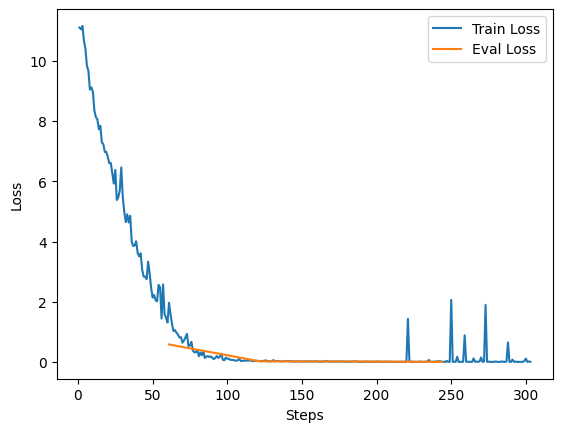

In [12]:
import matplotlib.pyplot as plt

# Initialize lists to hold training and evaluation losses and steps
train_losses = []
eval_losses = []
train_steps = []
eval_steps = []

# Populate the lists from the log history
for entry in trainer.state.log_history:
    if 'loss' in entry:
        train_losses.append(entry['loss'])
        train_steps.append(entry['step'])
    if 'eval_loss' in entry:
        eval_losses.append(entry['eval_loss'])
        eval_steps.append(entry['step'])

# Plot the losses
plt.plot(train_steps, train_losses, label='Train Loss')
plt.plot(eval_steps, eval_losses, label='Eval Loss')
plt.xlabel('Steps')
plt.ylabel('Loss')
plt.legend()
plt.show()